In [ ]:
import torch
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Assuming that we are on a CUDA machine, this should print a CUDA device:

print(f"We are training on {device} for this experiment")

assert 'cuda' in repr(device), "GPU is not selected in hardware accelerator dropdown"

We are training on cuda:0 for this experiment


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
your_google_drive_path = "/content/drive/MyDrive/Exp2/"
import os
assert os.path.isdir(your_google_drive_path), f"{your_google_drive_path} is not a valid location"

In [ ]:
%matplotlib inline
import torch
import torchvision
import torchvision.transforms as transforms

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5), (0.5))])

batch_size = 64

#Get dataset class object corresponding to train split
trainset = torchvision.datasets.MNIST(root='./data', train=True,
                                        download=True, transform=transform)

#Create data loader from train dataset object
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

#Get dataset class object corresponding to test split
testset = torchvision.datasets.MNIST(root='./data', train=False,
                                       download=True, transform=transform)

#Create data loader from test dataset object
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = [
        "zero",
        "one",
        "two",
        "three",
        "four",
        "five",
        "six",
        "seven",
        "eight",
        "nine",
    ]

100%|██████████| 9912422/9912422 [00:00<00:00, 318300014.12it/s]

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 58519658.85it/s]


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 115679374.37it/s]

Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


100%|██████████| 4542/4542 [00:00<00:00, 5345266.21it/s]


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw



torch.Size([64, 1, 28, 28]) torch.Size([64])


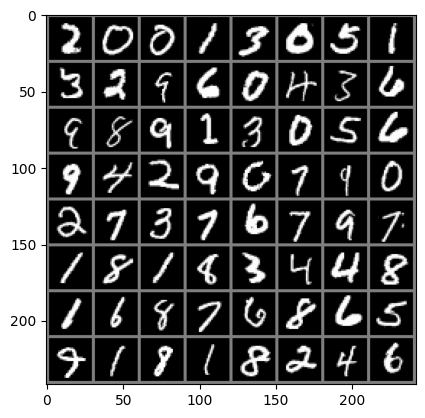

two   zero  zero  one   three zero  five  one   three two   nine  six   zero  four  three six   nine  eight nine  one   three zero  five  six   nine  four  two   nine  zero  seven nine  zero  two   seven three seven six   seven nine  seven one   eight one   eight three four  four  eight one   six   eight seven six   eight six   five  nine  one   eight one   eight two   four  six  


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = next(dataiter)

print(images.shape, labels.shape)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

### 2. [Task 1] Define a Convolutional Neural Network without residual connections
Copy the neural network from your lab and modify it to
take 3-channel images (instead of 1-channel images as it was defined), and output 10 classes in final layer of FC
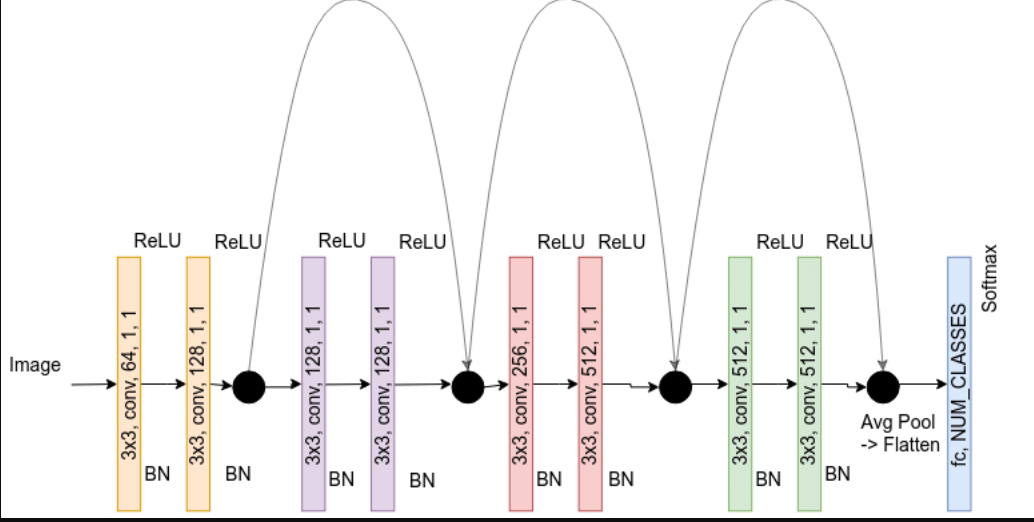



In [ ]:

import torch.nn as nn
import torch.nn.functional as F

#Define your own 'resnet9 without residual connections' neural network class with name 'Net' here
#Note :
######## Thou shall not use the following commented out Net() definition in final evaluation
######## This is placed here for you to play with incase your model class definition doesn't work


# class Net(nn.Module):
#     def __init__(self):
#         super().__init__()
#         self.conv1 = nn.Conv2d(3, 6, 5)
#         self.pool = nn.MaxPool2d(2, 2)
#         self.conv2 = nn.Conv2d(6, 16, 5)
#         self.fc1 = nn.Linear(16 * 5 * 5, 120)
#         self.fc2 = nn.Linear(120, 84)
#         self.fc3 = nn.Linear(84, 10)

#     def forward(self, x):
#         x = self.pool(F.relu(self.conv1(x)))
#         x = self.pool(F.relu(self.conv2(x)))
#         x = torch.flatten(x, 1) # flatten all dimensions except batch
#         x = F.relu(self.fc1(x))
#         x = F.relu(self.fc2(x))
#         x = self.fc3(x)
#         return x

class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(1, 64, 3,stride=1,padding=1)
        self.norm1 = nn.BatchNorm2d(64)
        self.conv2 = nn.Conv2d(64, 128, 3,1,1)
        self.norm2 = nn.BatchNorm2d(128)

        self.conv3 = nn.Conv2d(128, 128, 3,1,1)
        self.norm3 = nn.BatchNorm2d(128)
        self.conv4 = nn.Conv2d(128, 128, 3,1,1)
        self.norm4 = nn.BatchNorm2d(128)

        self.conv5 = nn.Conv2d(128, 256, 3,1,1)
        self.norm5 = nn.BatchNorm2d(256)
        self.conv6 = nn.Conv2d(256, 512, 3,1,1)
        self.norm6 = nn.BatchNorm2d(512)

        self.conv7 = nn.Conv2d(512, 512, 3,1,1)
        self.norm7 = nn.BatchNorm2d(512)
        self.conv8 = nn.Conv2d(512, 512, 3,1,1)
        self.norm8 = nn.BatchNorm2d(512)

        self.conv9 = nn.Conv2d(128,512,3,1,1)
        self.norm9 = nn.BatchNorm2d(512)

        self.pool = nn.AdaptiveAvgPool2d(1)

        self.fc1 = nn.Linear(512, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.norm1(F.relu(self.conv1(x)))
        x = self.norm2(F.relu(self.conv2(x)))
        y = x
        x = self.norm3(F.relu(self.conv3(x)))
        x = self.norm4(F.relu(self.conv4(x)))
        x = x+y
        z = x
        x = self.norm5(F.relu(self.conv5(x)))
        x = self.norm6(F.relu(self.conv6(x)))
        z = self.norm9(F.relu(self.conv9(z)))
        x = x+z
        k = x
        x = self.norm7(F.relu(self.conv7(x)))
        x = self.norm8(F.relu(self.conv8(x)))
        x = x+k
        x = self.pool(x)
        x = torch.squeeze(x)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

net = Net().to(device)

In [ ]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [ ]:
def validator(testloader=None,net=None):
    correct = 0
    total = 0
    # since we're not training, we don't need to calculate the gradients for our outputs
    with torch.no_grad():
        for data in testloader:
            images, labels = data
            images = images.to(device)
            labels = labels.to(device)

            # calculate outputs by running images through the network
            outputs = net(images)
            # the class with the highest energy is what we choose as prediction
            # perform max along dimension 1, since dimension 0 is batch dimension
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    print(f'Accuracy of the network : {100 * correct / total} %')
    return correct/total

In [ ]:
start_epoch=0
end_epoch=10

#If you are resuming your model, Uncomment following lines

# checkpoint = torch.load(your_google_drive_path+'checkpoint.pth')
# start_epoch = checkpoint['epoch']+1
# net.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
best_accuracy = -1.0
train_loss=[]
test_acc=[]
for epoch in range(start_epoch,end_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 100 == 99:
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 100:.3f}')
            train_loss.append(running_loss/100)
            running_loss = 0.0

    current_accuracy = validator(testloader=testloader,net=net)
    if current_accuracy>best_accuracy:
        best_accuracy = current_accuracy
        test_acc.append(best_accuracy)

        torch.save(
            {'epoch':epoch,
             'model_state_dict': net.state_dict(),
             'optimizer_state_dict': optimizer.state_dict()
             },

             your_google_drive_path+'best_model.pth')

    #Save model as checkpoint
    torch.save(
        {'epoch':epoch,
         'model_state_dict': net.state_dict(),
         'optimizer_state_dict': optimizer.state_dict()
         },
         your_google_drive_path+'checkpoint.pth')


print("Best Accuracy :",best_accuracy*100)
print('Finished Training')

[1,   100] loss: 2.259
[1,   200] loss: 2.104
[1,   300] loss: 1.931
[1,   400] loss: 1.633
[1,   500] loss: 1.295
[1,   600] loss: 0.958
[1,   700] loss: 0.698
[1,   800] loss: 0.534
[1,   900] loss: 0.399
Accuracy of the network : 91.83 %
[2,   100] loss: 0.305
[2,   200] loss: 0.230
[2,   300] loss: 0.221
[2,   400] loss: 0.197
[2,   500] loss: 0.168
[2,   600] loss: 0.160
[2,   700] loss: 0.152
[2,   800] loss: 0.130
[2,   900] loss: 0.118
Accuracy of the network : 96.84 %
[3,   100] loss: 0.106
[3,   200] loss: 0.104
[3,   300] loss: 0.102
[3,   400] loss: 0.091
[3,   500] loss: 0.083
[3,   600] loss: 0.097
[3,   700] loss: 0.080
[3,   800] loss: 0.079
[3,   900] loss: 0.078
Accuracy of the network : 97.86 %
[4,   100] loss: 0.067
[4,   200] loss: 0.064
[4,   300] loss: 0.069
[4,   400] loss: 0.067
[4,   500] loss: 0.066
[4,   600] loss: 0.057
[4,   700] loss: 0.058
[4,   800] loss: 0.062
[4,   900] loss: 0.065
Accuracy of the network : 98.31 %
[5,   100] loss: 0.046
[5,   200] lo

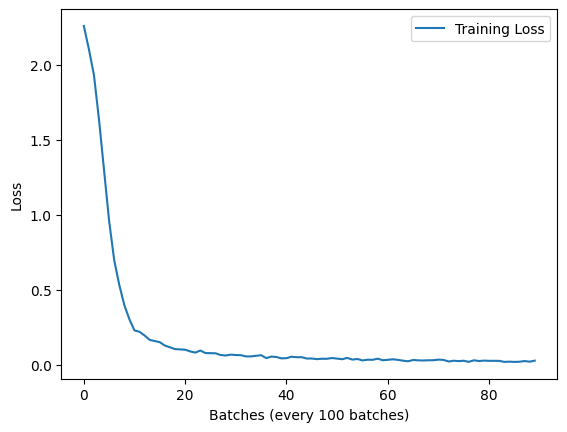

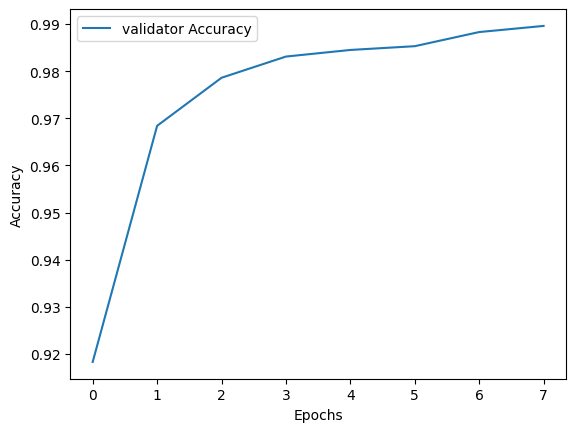

In [ ]:
plt.plot(train_loss, label='Training Loss')
plt.xlabel('Batches (every 100 batches)')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(test_acc, label='validator Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

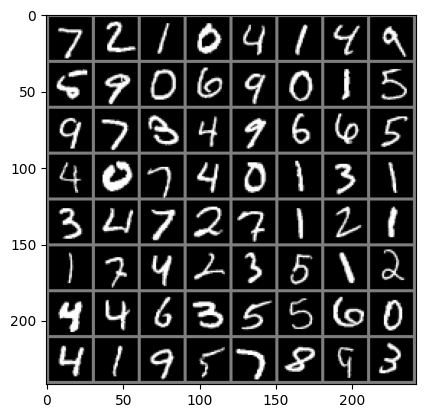

GroundTruth:  seven two   one   zero  four  one   four  nine 


In [ ]:
dataiter = iter(testloader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(8)))

Load your best saved model and see what the neural network thinks these examples above are:

In [ ]:
net_best = Net().to(device)
checkpoint = torch.load(your_google_drive_path+'best_model.pth')
net_best.load_state_dict(checkpoint['model_state_dict'])


images = images.to(device)
labels = labels.to(device)

outputs = net_best(images)

The outputs are energies for the 10 classes.
The higher the energy for a class, the more the network
thinks that the image is of the particular class.
So, let's get the index of the highest energy:



In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(8)))

Predicted:  seven two   one   zero  four  one   four  nine 


# **Task 2 & Task 3 (Custom Dataset)**

In [ ]:
import os
import random
import numpy as np
from PIL import Image
import torch
from torch.utils.data import Dataset
import torchvision.transforms as transforms
from torchvision.transforms.functional import to_tensor

class CustomDataset(Dataset):
    def __init__(self, root_dir, num_images = 3000, transform=None):
        self.root_dir = root_dir
        self.numeral_names = ['0','1','2','3','4','5','6','7','8','9']
        self.num_images = num_images
        self.transform = transform

    def __len__(self):
        return self.num_images

    def __getitem__(self, idx):
        numeral_idx = idx // 300
        img_idx = idx % 300
        numeral_path = os.path.join(self.root_dir, self.numeral_names[numeral_idx])
        img_path = os.path.join(numeral_path, f'img_{img_idx+1:03}.jpg')
        image = Image.open(img_path)
        # image = to_tensor(image)
        if self.transform:
            image = self.transform(image)
        return (image, numeral_idx)


In [ ]:
import numpy as np
import cv2

# Set the path to the directory containing the images of the dataset
dataset_path = '/content/drive/MyDrive/Telugunum/'

# Initialize empty lists to store pixel values
pixel_values = []
num_images = 300

# Loop over all the images in the dataset
for j in range(10):
    for i in range(1, num_images+1):
        image = cv2.imread(dataset_path + str(j) + f'/img_{i:03}.jpg')

        # Convert the image to grayscale
        image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

        for i in image_gray.reshape(-1):
            pixel_values.append(i)

# Calculate the mean of the pixel values
mean = np.mean(pixel_values)

# Calculate the variance of the pixel values
variance = np.var(pixel_values)

# Calculate the standard deviation of the pixel values
std_dev = np.sqrt(variance)

print(f"Mean: {mean/255:.4f}, Standard deviation: {std_dev/255:.4f}")

Mean: 0.2496, Standard deviation: 0.4304


In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.optim as optim
import torch.nn as nn
from torch.utils.data import DataLoader
from sklearn.model_selection import train_test_split

# Set up the custom dataset
dataset = CustomDataset(root_dir='/content/drive/MyDrive/Telugunum',transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.2496,), (0.4304,))
                             ]))
# dataset = dataset.to(device)
train_dataset, test_dataset = train_test_split(dataset, test_size=0.2, random_state=85,shuffle=True)

batch_size=32
classes = [
        "zero",
        "one",
        "two",
        "three",
        "four",
        "five",
        "six",
        "seven",
        "eight",
        "nine",
    ]
# Create dataloaders for train and test sets
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

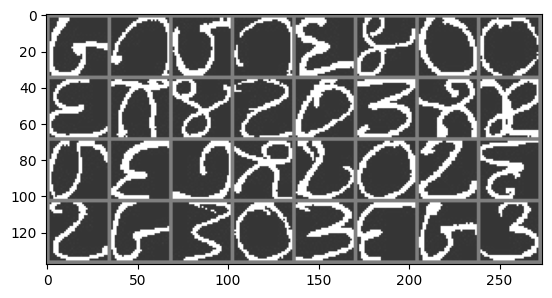

eight one   eight one   six   four  zero  zero  six   five  four  seven zero  three five  five  eight nine  two   five  seven zero  seven nine  seven eight three zero  three nine  eight three


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [ ]:
net1 = Net().to(device)
criterion1 = nn.CrossEntropyLoss()
optimizer1 = optim.SGD(net1.parameters(), lr=0.001, momentum=0.9)


In [ ]:
start_epoch=0
end_epoch=30
for param in net1.parameters():
    param.requires_grad = True

In [ ]:
best_accuracy = -1.0
train_loss=[]
test_acc=[]
for epoch in range(start_epoch,end_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer1.zero_grad()

        # forward + backward + optimize
        outputs = net1(inputs)
        loss = criterion1(outputs, labels)
        loss.backward()
        optimizer1.step()

        # print statistics
        running_loss += loss.item()
        if i % 30 == 29:    # print every 1000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 30:.3f}')
            train_loss.append(running_loss/30)
            running_loss = 0.0

    current_accuracy = validator(testloader=test_loader,net=net1)
    if current_accuracy>best_accuracy:
        best_accuracy = current_accuracy
        test_acc.append(best_accuracy)
        torch.save(
            {'epoch':epoch,
             'model_state_dict': net1.state_dict(),
             'optimizer_state_dict': optimizer1.state_dict()
             },

             your_google_drive_path+'best_model_1.pth')

    #Save model as checkpoint
    torch.save(
        {'epoch':epoch,
         'model_state_dict': net1.state_dict(),
         'optimizer_state_dict': optimizer1.state_dict()
         },
         your_google_drive_path+'checkpoint_1.pth')


print("Best Accuracy :",best_accuracy*100)
print('Finished Training')

[1,    30] loss: 2.300
[1,    60] loss: 2.276
Accuracy of the network : 27.833333333333332 %
[2,    30] loss: 2.245
[2,    60] loss: 2.219
Accuracy of the network : 41.333333333333336 %
[3,    30] loss: 2.161
[3,    60] loss: 2.108
Accuracy of the network : 48.5 %
[4,    30] loss: 1.970
[4,    60] loss: 1.876
Accuracy of the network : 51.0 %
[5,    30] loss: 1.657
[5,    60] loss: 1.549
Accuracy of the network : 61.666666666666664 %
[6,    30] loss: 1.326
[6,    60] loss: 1.227
Accuracy of the network : 72.83333333333333 %
[7,    30] loss: 0.928
[7,    60] loss: 0.856
Accuracy of the network : 81.0 %
[8,    30] loss: 0.680
[8,    60] loss: 0.592
Accuracy of the network : 85.16666666666667 %
[9,    30] loss: 0.544
[9,    60] loss: 0.444
Accuracy of the network : 89.33333333333333 %
[10,    30] loss: 0.378
[10,    60] loss: 0.373
Accuracy of the network : 90.0 %
[11,    30] loss: 0.331
[11,    60] loss: 0.283
Accuracy of the network : 92.0 %
[12,    30] loss: 0.260
[12,    60] loss: 0.26

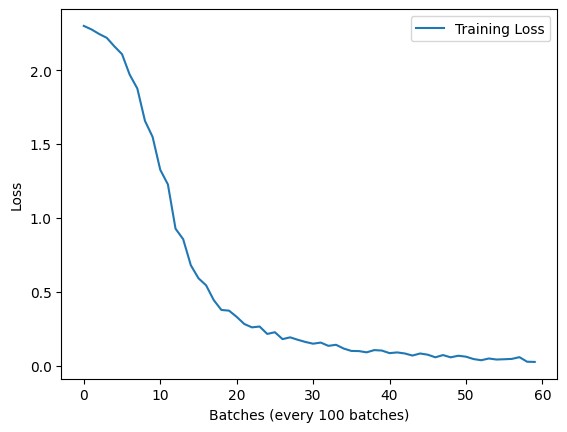

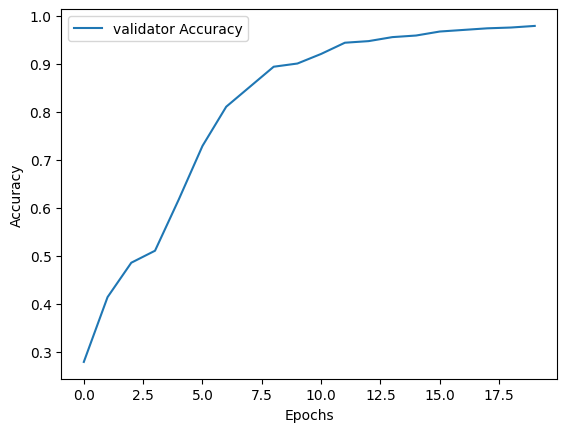

In [ ]:
plt.plot(train_loss, label='Training Loss')
plt.xlabel('Batches (every 100 batches)')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(test_acc, label='validator Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

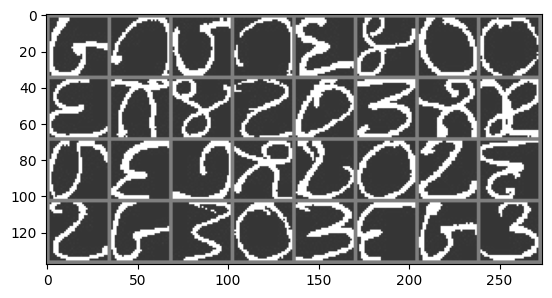

GroundTruth:  eight one   eight one   six   four  zero  zero  six   five  four  seven zero  three five  five  eight nine  two   five  seven zero  seven nine  seven eight three zero  three nine  eight three


In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(32)))

In [ ]:
net_best = Net().to(device)
checkpoint = torch.load(your_google_drive_path+'best_model_1.pth')
net_best.load_state_dict(checkpoint['model_state_dict'])


images = images.to(device)
labels = labels.to(device)

outputs = net_best(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(32)))

Predicted:  eight one   eight one   six   five  zero  one   six   five  four  seven zero  three five  five  eight nine  two   five  seven zero  seven nine  seven eight three zero  three nine  eight three


# ***Task 4***

In [ ]:
net = Net().to(device)
checkpoint = torch.load(your_google_drive_path+'best_model.pth')
net.load_state_dict(checkpoint['model_state_dict'])





for param in net.parameters():
    param.requires_grad = False
for param in net.fc1.parameters():
    param.requires_grad = True
for param in net.fc2.parameters():
    param.requires_grad = True
for param in net.fc3.parameters():
    param.requires_grad = True

optimizer = optim.SGD(net.parameters(), lr=0.01, momentum=0.9)

In [ ]:
start_epoch=10
end_epoch=40

#If you are resuming your model, Uncomment following lines

# checkpoint = torch.load(your_google_drive_path+'best_model.pth')
# start_epoch = checkpoint['epoch']+1
# net.load_state_dict(checkpoint['model_state_dict'])
# optimizer.load_state_dict(checkpoint['optimizer_state_dict'])

In [ ]:
best_accuracy = -1.0
train_loss=[]
test_acc=[]
for epoch in range(start_epoch,end_epoch):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(train_loader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        inputs = inputs.to(device)
        labels = labels.to(device)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 30 == 29:    # print every 1000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 30:.3f}')
            train_loss.append(running_loss/30)
            running_loss = 0.0

    current_accuracy = validator(testloader=test_loader,net=net)
    if current_accuracy>best_accuracy:
        best_accuracy = current_accuracy
        test_acc.append(best_accuracy)

        torch.save(
            {'epoch':epoch,
             'model_state_dict': net.state_dict(),
             'optimizer_state_dict': optimizer.state_dict()
             },

             your_google_drive_path+'best_model_2.pth')

    #Save model as checkpoint
    torch.save(
        {'epoch':epoch,
         'model_state_dict': net.state_dict(),
         'optimizer_state_dict': optimizer.state_dict()
         },
         your_google_drive_path+'checkpoint_2.pth')


print("Best Accuracy :",best_accuracy*100)
print('Finished Training')

[11,    30] loss: 2.144
[11,    60] loss: 0.717
Accuracy of the network : 84.5 %
[12,    30] loss: 0.425
[12,    60] loss: 0.343
Accuracy of the network : 90.16666666666667 %
[13,    30] loss: 0.284
[13,    60] loss: 0.272
Accuracy of the network : 90.83333333333333 %
[14,    30] loss: 0.235
[14,    60] loss: 0.210
Accuracy of the network : 92.0 %
[15,    30] loss: 0.215
[15,    60] loss: 0.170
Accuracy of the network : 93.83333333333333 %
[16,    30] loss: 0.183
[16,    60] loss: 0.148
Accuracy of the network : 94.16666666666667 %
[17,    30] loss: 0.133
[17,    60] loss: 0.138
Accuracy of the network : 94.83333333333333 %
[18,    30] loss: 0.103
[18,    60] loss: 0.105
Accuracy of the network : 94.83333333333333 %
[19,    30] loss: 0.115
[19,    60] loss: 0.113
Accuracy of the network : 95.33333333333333 %
[20,    30] loss: 0.111
[20,    60] loss: 0.083
Accuracy of the network : 95.5 %
[21,    30] loss: 0.085
[21,    60] loss: 0.084
Accuracy of the network : 95.16666666666667 %
[22, 

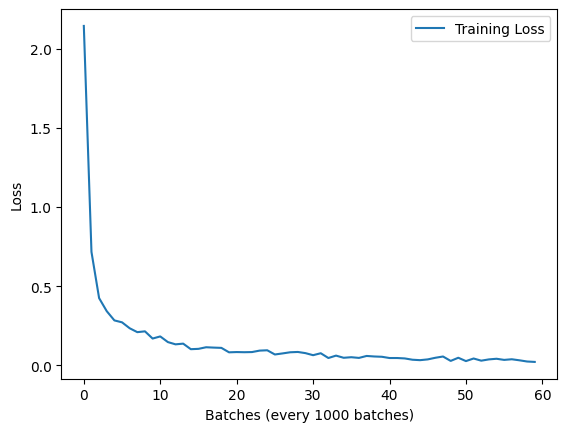

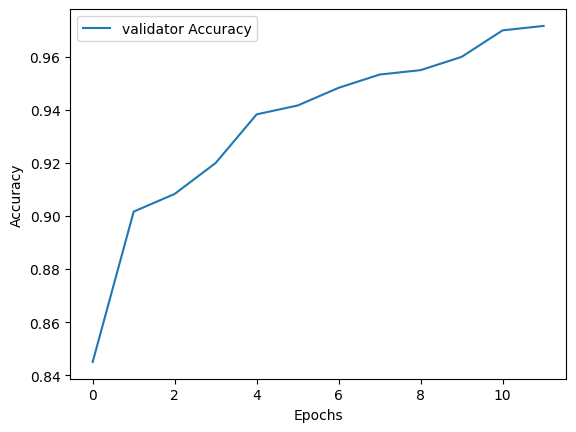

In [ ]:
plt.plot(train_loss, label='Training Loss')
plt.xlabel('Batches (every 1000 batches)')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Plot Accuracy
plt.plot(test_acc, label='validator Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

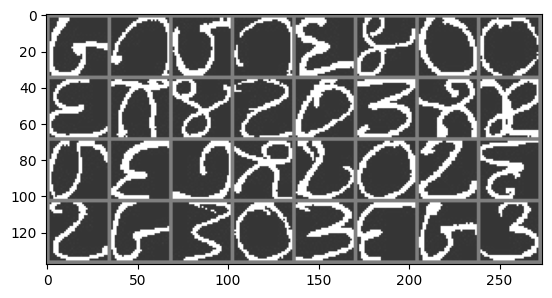

GroundTruth:  eight one   eight one   six   four  zero  zero  six   five  four  seven zero  three five  five  eight nine  two   five  seven zero  seven nine  seven eight three zero  three nine  eight three


In [ ]:
dataiter = iter(test_loader)
images, labels = next(dataiter)

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(32)))

In [ ]:
net_best = Net().to(device)
checkpoint = torch.load(your_google_drive_path+'best_model_2.pth')
net_best.load_state_dict(checkpoint['model_state_dict'])


images = images.to(device)
labels = labels.to(device)

outputs = net_best(images)

In [ ]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(32)))

Predicted:  eight one   eight one   six   four  zero  one   six   five  four  seven five  three four  five  eight nine  two   five  seven zero  seven nine  seven eight three zero  three nine  eight three
